In [59]:
import joblib
import pandas as pd
from utils import Convert2EncodedDF

cnu_pharmacy = '366'
cnu_humanity = '368'
# df = pd.read_csv()
df = pd.read_csv('csvs/1015_data.csv', index_col=0)
new_df = Convert2EncodedDF(df, ['요일', '시간대'])
m = joblib.load('models/1015_xb.pkl')
new_df

,am/pm,대여량,강수량,기온,풍속,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,시간대_0,시간대_1,시간대_2,시간대_3,시간대_4,시간대_5,시간대_6,시간대_7,시간대_8,시간대_9,시간대_10,시간대_11
0,0,0,25.6,25.9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,25.6,25.9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,25.6,25.9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,25.6,25.9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,25.6,25.9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1,0,0.0,-1.1,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3692,1,0,0.0,-1.1,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3693,1,0,0.0,-1.1,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3694,1,0,0.0,-1.1,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


/tmp/ipykernel_30689/2094319430.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


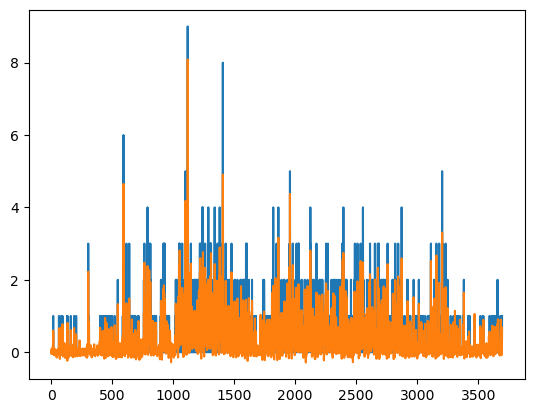

In [60]:
import matplotlib.pyplot as plt

x = new_df.drop(columns=['대여량'])
y_hat = m.predict(x)

fig, ax = plt.subplots()
ax.plot(new_df.index, new_df['대여량'])
ax.plot(x.index, y_hat)
fig.show()

/tmp/ipykernel_30689/1857765722.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


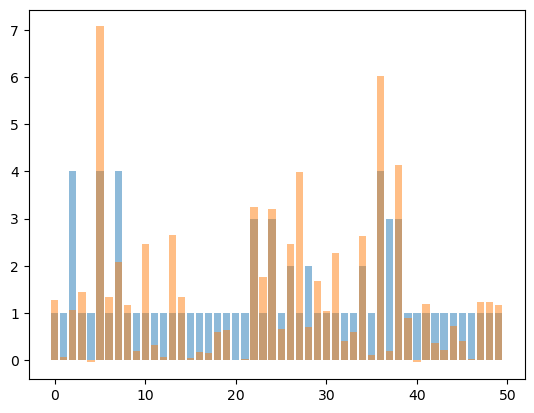

In [94]:
import random
valid_df = pd.read_csv(f'csvs/{cnu_humanity}_data.csv', index_col=0)
model2 = joblib.load(f'models/{cnu_pharmacy}_xb.pkl')
new_valid_df = Convert2EncodedDF(valid_df, ['요일', '시간대'])
new_valid_df = new_valid_df.loc[new_valid_df['대여량'] > 0]
vx = new_valid_df.drop(columns=['대여량'])
vy = new_valid_df['대여량']
# vy_hat = model2.predict(vx)

PAR_RANGE = 50
randpick = [random.randint(0, len(vx)-1) for r in range(PAR_RANGE)]

vx = [new_valid_df.iloc[r] for r in randpick]
vy = [new_valid_df.iloc[r]['대여량'] for r in randpick]
vx = pd.DataFrame(vx).drop(columns=['대여량'])

vy_hat = model2.predict(vx)

fig, ax = plt.subplots()
ax.bar(range(PAR_RANGE), vy, alpha=0.5)
ax.bar(range(PAR_RANGE), vy_hat, alpha=0.5)
fig.show()